In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm

In [2]:
learning_rate = 1e-2
n_iters = 1000
test_size = 0.2
random_state = 42

In [3]:
class LinearRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000) -> None:
        self.lr = learning_rate
        self.n_iters = n_iters
        self.betas = None
        self.intercept = None

    def fit(self, X: np.array, y: np.array) -> None:
        n_samples, n_features = X.shape

        self.betas = np.zeros(n_features)
        self.intercept = 0

        for _ in tqdm(range(self.n_iters)):
            y_pred = np.dot(X, self.betas) + self.intercept

            db = np.dot(X.T, (y_pred - y)) / n_samples
            di = np.sum(y_pred - y)

            self.betas -= self.lr * db
            self.intercept -= self.lr * di

    def predict(self, X) -> np.array:
        return np.dot(self.betas, X.T) + self.intercept

In [4]:
def mean_squared_error(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

In [5]:
X, y = datasets.make_regression(n_samples=100,
                                n_features=1,
                                noise=20,
                                random_state=random_state)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=test_size,
                                                    random_state=random_state)

In [7]:
lin_reg = LinearRegression(learning_rate=learning_rate,
                           n_iters=n_iters)
lin_reg.fit(X_train, y_train)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [8]:
preds = lin_reg.predict(X_test)

In [9]:
mean_squared_error(y_test, preds)

416.8560458009546

In [10]:
slope, intercept = np.polyfit(np.squeeze(X), np.squeeze(y), 1)
best_fit_line = slope * X + intercept

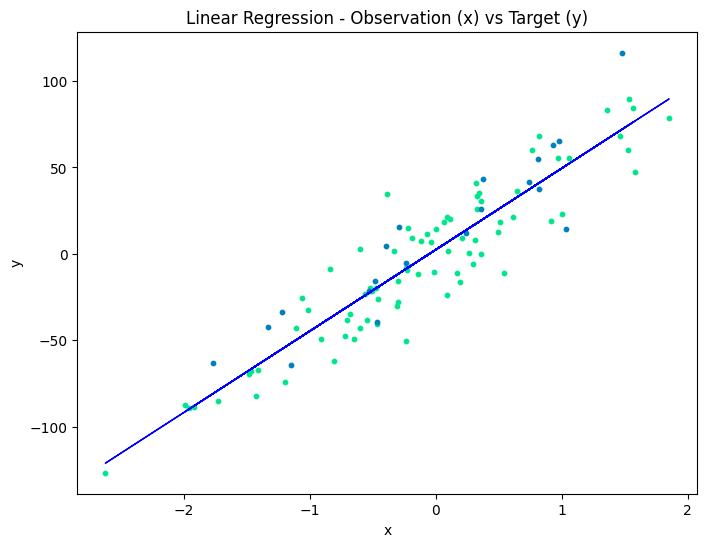

In [11]:
cmap = plt.get_cmap('winter')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, best_fit_line, color='blue', linewidth=1)
plt.title('Linear Regression - Observation (x) vs Target (y)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()